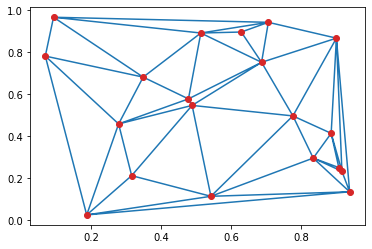

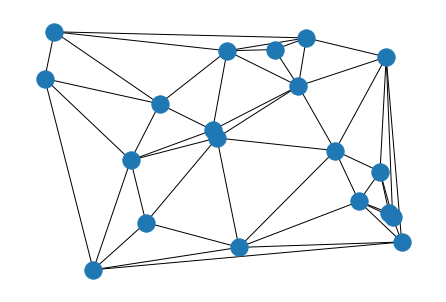

[0, 12, 9, 5, 2, 7, 14, 1, 4, 13, 19, 15, 11, 10, 3, 16, 8, 17, 6, 18]


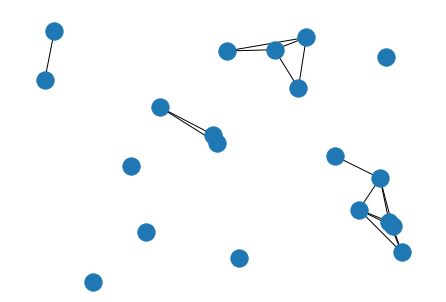

In [1]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np
import networkx as nx
import math

a = 1 
b = 1
num_points = 20
radius = .2

points = np.random.rand(num_points, 2)
points[:, 0] = a*points[:, 0] 
points[:, 1] = b*points[:, 1] 

tri = Delaunay(points)


plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.triplot(points[:, 0], points[:, 1], 'o')
plt.show()

nlist = tri.vertex_neighbor_vertices

g = nx.Graph()

for n in range(num_points):
    g.add_edges_from([(n,x) for x in nlist[1][nlist[0][n]:nlist[0][n+1]]])
    
pos = { n : points[n, :] for n in range(num_points)}

plt.figure()
nx.draw(g,pos=pos)
plt.show()

print(g.nodes())

h = nx.Graph()


for n1 in g.nodes():
    h.add_node(n1)
    for n2 in g.nodes():
        if n1!=n2:
            if math.sqrt((pos[n1][0]-pos[n2][0])**2+(pos[n1][1]-pos[n2][1])**2) < radius:
                h.add_edge(n1,n2)
                
                
plt.figure()
nx.draw(h,pos=pos)
plt.show()           